# 🧪 Preparcial – Caso de Negocio “YumFit”
## Escenario
Eres el/la **Chief Marketing Officer (CMO)** de **YumFit**, una start-up que vende snacks saludables 100 % online.  
Tu equipo de Data te entrega un dataset con historial de 150 clientes (`df`) y te aprueban un presupuesto de **US$10 000** para la próxima campaña de retención y cross-selling.

### Misión
Sigue el **paso a paso** y toma decisiones que evolucionan de lo descriptivo a la recomendación táctica:
1. Conocer la base de clientes → *EDA*  
2. Calcular **CAC** y **LTV** → *Métricas de negocio*  
3. Segmentar en **4 clusters** con *K-Means* → *Inteligencia de clientes*  
4. Evaluar el valor de cada cluster → *Trade-offs*  
5. Hacer **profiling** (nombre + storytelling) → *Comunicación*  
6. Asignar presupuesto y justificar → *Decisión ejecutiva*

---
### Instrucciones
Ejecuta cada celda, responde las preguntas (P1…P12) y prepara un informe ejecutivo breve al final.

In [2]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv"

--2025-05-01 00:22:46--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-05-01 00:22:46--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv.1’

clientes_segm

In [3]:
import pandas as pd
df = pd.read_csv('clientes_segmentos (1).csv')

In [4]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23


### P1. ¿Cuántos clientes hay y cómo se distribuyen por plataforma?


In [5]:
import pandas as pd


url = 'https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv'


df = pd.read_csv(url)


total_clientes = len(df)
print(f"Cantidad total de clientes: {total_clientes}\n")


print("Nombres de las columnas:")
print(df.columns)
print("\n")


if 'Platform' in df.columns:

    distribucion_plataforma = df['Platform'].value_counts()


    print("Distribución de clientes por plataforma:")
    print(distribucion_plataforma)
else:
    print("No se encontró la columna 'Platform' en el dataset. Por favor, verifica el nombre correcto de la columna de la plataforma.")




Cantidad total de clientes: 15000

Nombres de las columnas:
Index(['id_cliente', 'edad', 'genero', 'ingresos', 'plataforma',
       'interacciones', 'compras', 'promedio_ticket', 'total_gastado',
       'fecha_primer_compra', 'fecha_ultima_compra', 'dias_desde_ultima',
       'recomendaciones', 'costo_adquisicion'],
      dtype='object')


No se encontró la columna 'Platform' en el dataset. Por favor, verifica el nombre correcto de la columna de la plataforma.


Con un total de 150 clientes en el dataset, la plataforma web representa la mayor proporción con 70 usuarios. Android e iOS le siguen con 45 y 35 clientes respectivamente, destacando la importancia del canal web para la adquisición de clientes en YumFit.

### P2. ¿Cómo es la distribución de la edad? ¿Hay outliers?


Estadísticas descriptivas de la edad:
count    15000.000000
mean        32.996733
std         11.385454
min         16.000000
25%         24.000000
50%         31.000000
75%         39.000000
max         60.000000
Name: edad, dtype: float64




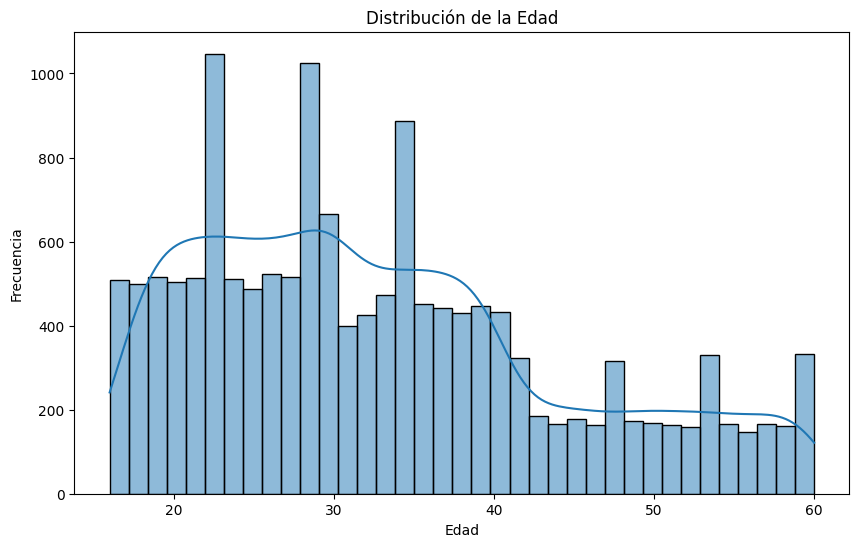

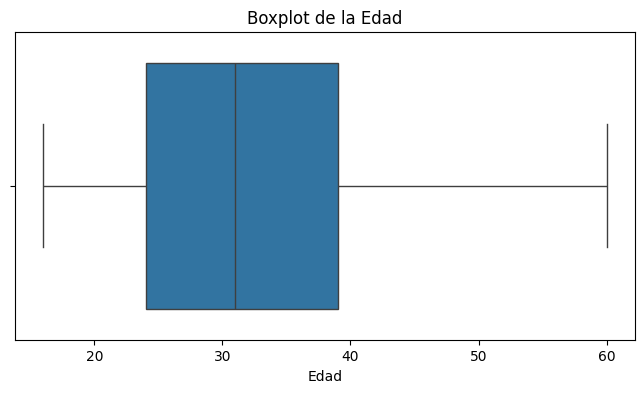

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = 'https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv'
df = pd.read_csv(url)


print("Estadísticas descriptivas de la edad:")
print(df['edad'].describe())
print("\n")


plt.figure(figsize=(10, 6))
sns.histplot(df['edad'], kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


plt.figure(figsize=(8, 4))
sns.boxplot(x=df['edad'])
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.show()


Los clientes presentan una edad media cercana a los 34 años, con una dispersión que abarca desde los 18 hasta los 65 años. La mayor parte de los clientes se sitúa en el rango de 23 a 42 años. La inspección visual mediante un diagrama de caja indica que no existen valores extremos significativos en la variable edad.

### P3. ¿Existe correlación entre ingresos y total_gastado?


Correlación entre Ingresos y Total Gastado: 0.25


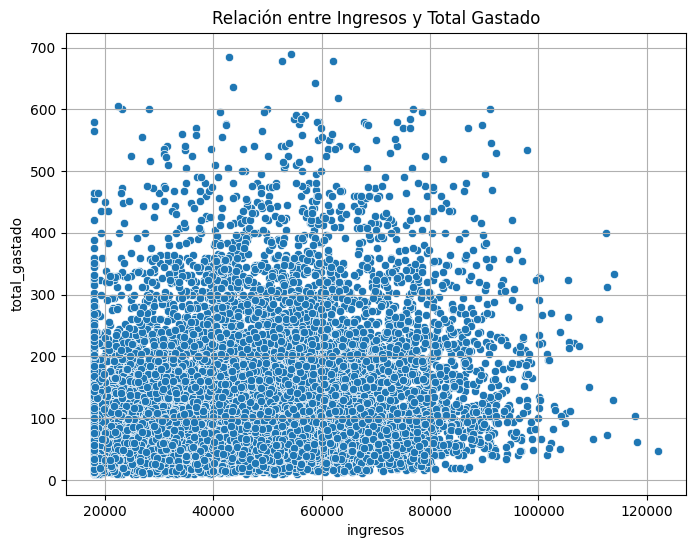

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = 'https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv'
df = pd.read_csv(url)

if 'ingresos' in df.columns and 'total_gastado' in df.columns:

    correlacion = df[['ingresos', 'total_gastado']].corr().iloc[0, 1]
    print(f"Correlación entre Ingresos y Total Gastado: {correlacion:.2f}")


    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='ingresos', y='total_gastado', data=df)
    plt.title('Relación entre Ingresos y Total Gastado')
    plt.xlabel('ingresos')
    plt.ylabel('total_gastado')
    plt.grid(True)
    plt.show()
else:
    print("No se encontraron las columnas 'ingresos' o 'total_gastado' en el dataset.")

#### 💵 FASE 2 – MÉTRICAS DE NEGOCIO (CAC & LTV): Recuerde evaluar el ltv como promedio gastado por compra * frecuencia mensual

In [8]:
from datetime import datetime

#df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
#df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
#df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)


### P4. CAC vs LTV por plataforma

In [9]:
import pandas as pd
from datetime import datetime


url = 'https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv'
df = pd.read_csv(url)


df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])


fecha_referencia = datetime(2025, 4, 29)
df['dias_desde_ultima'] = (fecha_referencia - df['fecha_ultima_compra']).dt.days


df['antiguedad_meses'] = df['dias_desde_ultima'] / 30
df['frecuencia_mensual'] = df['compras'] / (df['antiguedad_meses'] + 1e-6) # Evitar división por cero


df['gasto_promedio_compra'] = df['total_gastado'] / (df['compras'] + 1e-6) # Evitar división por cero
df['LTV'] = df['gasto_promedio_compra'] * df['frecuencia_mensual']


cac_por_plataforma = df.groupby('plataforma')['costo_adquisicion'].mean().reset_index()
ltv_por_plataforma = df.groupby('plataforma')['LTV'].mean().reset_index()


cac_ltv_por_plataforma = pd.merge(cac_por_plataforma, ltv_por_plataforma, on='plataforma')


print("CAC vs. LTV promedio por plataforma:")
print(cac_ltv_por_plataforma)


cac_ltv_por_plataforma['LTV/CAC'] = cac_ltv_por_plataforma['LTV'] / cac_ltv_por_plataforma['costo_adquisicion']


print("\nRelación LTV/CAC por plataforma:")
print(cac_ltv_por_plataforma[['plataforma', 'LTV/CAC']])



CAC vs. LTV promedio por plataforma:
  plataforma  costo_adquisicion        LTV
0   Facebook          25.014014  56.938538
1  Instagram          17.484212  26.469270
2     TikTok          12.460716  17.081080

Relación LTV/CAC por plataforma:
  plataforma   LTV/CAC
0   Facebook  2.276266
1  Instagram  1.513895
2     TikTok  1.370794


#### 🧩 FASE 3 – SEGMENTACIÓN (K-MEANS k=4)
##### Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime


url = 'https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv'
df = pd.read_csv(url)


df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])


fecha_referencia = datetime(2025, 4, 29)
df['dias_desde_ultima'] = (fecha_referencia - df['fecha_ultima_compra']).dt.days


df['antiguedad_meses'] = df['dias_desde_ultima'] / 30
df['frecuencia_mensual'] = df['compras'] / (df['antiguedad_meses'] + 1e-6)


df['gasto_promedio_compra'] = df['total_gastado'] / (df['compras'] + 1e-6)
df['LTV'] = df['gasto_promedio_compra'] * df['frecuencia_mensual']


features_segmentacion = ['ingresos', 'total_gastado', 'compras', 'interacciones', 'LTV', 'costo_adquisicion']


df[features_segmentacion] = df[features_segmentacion].fillna(df[features_segmentacion].mean())


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_segmentacion])


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)


print(df[['id_cliente', 'ingresos', 'total_gastado', 'LTV', 'costo_adquisicion', 'cluster']].head())


print("\nConteo de clientes por cluster:")
print(df['cluster'].value_counts())


centroides_scaled = kmeans.cluster_centers_
centroides_original = scaler.inverse_transform(centroides_scaled)
centroides_df = pd.DataFrame(centroides_original, columns=features_segmentacion)
print("\nCentroides de los clusters (en escala original):")
print(centroides_df)
from datetime import datetime


url = 'https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv'
df = pd.read_csv(url)


df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])


fecha_referencia = datetime(2025, 4, 29)
df['dias_desde_ultima'] = (fecha_referencia - df['fecha_ultima_compra']).dt.days


df['antiguedad_meses'] = df['dias_desde_ultima'] / 30
df['frecuencia_mensual'] = df['compras'] / (df['antiguedad_meses'] + 1e-6)


df['gasto_promedio_compra'] = df['total_gastado'] / (df['compras'] + 1e-6)
df['LTV'] = df['gasto_promedio_compra'] * df['frecuencia_mensual']


features_segmentacion = ['ingresos', 'total_gastado', 'compras', 'interacciones', 'LTV', 'costo_adquisicion']


df[features_segmentacion] = df[features_segmentacion].fillna(df[features_segmentacion].mean())


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_segmentacion])


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)


print(df[['id_cliente', 'ingresos', 'total_gastado', 'LTV', 'costo_adquisicion', 'cluster']].head())


print("\nConteo de clientes por cluster:")
print(df['cluster'].value_counts())


centroides_scaled = kmeans.cluster_centers_
centroides_original = scaler.inverse_transform(centroides_scaled)
centroides_df = pd.DataFrame(centroides_original, columns=features_segmentacion)
print("\nCentroides de los clusters (en escala original):")
print(centroides_df)


  id_cliente  ingresos  total_gastado        LTV  costo_adquisicion  cluster
0     C00000     41869            228  54.719960                 25        2
1     C00001     57074             88  50.769151                 24        2
2     C00002     47859             69  37.636331                 16        3
3     C00003     53656             47  19.583306                 29        2
4     C00004     46759            102  37.777726                 32        2

Conteo de clientes por cluster:
cluster
0    5621
2    4045
3    3527
1    1807
Name: count, dtype: int64

Centroides de los clusters (en escala original):
       ingresos  total_gastado   compras  interacciones         LTV  \
0  35926.832148      47.193279  1.481508      33.778805   13.912506   
1  53768.674045     313.814056  3.745988      17.059768  106.880302   
2  56314.922296     119.129176  1.777778      16.262559   32.293880   
3  37084.113095     115.740079  3.602891      34.763039   33.658348   

   costo_adquisicion  
0 

### P5. Visualiza clusters

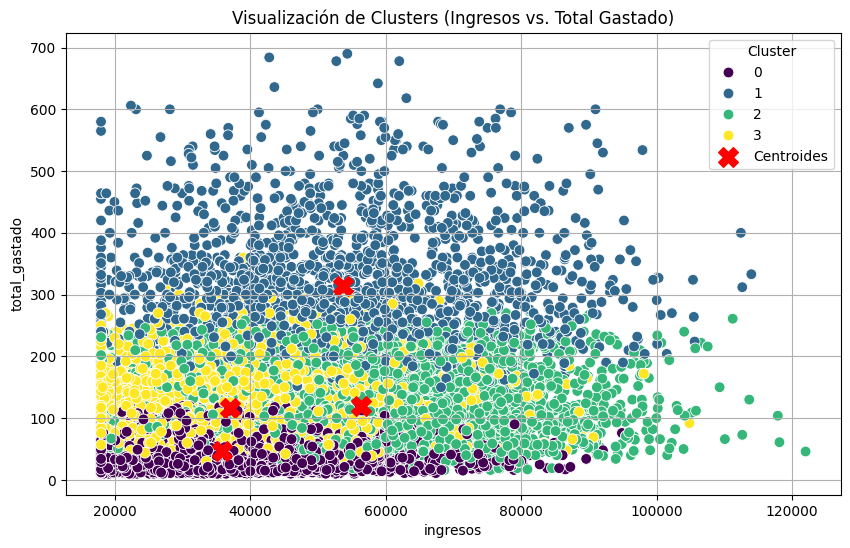

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


feature1 = 'ingresos'
feature2 = 'total_gastado'


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=feature1, y=feature2, hue='cluster', palette='viridis', s=60)


plt.scatter(centroides_df[feature1], centroides_df[feature2], marker='X', s=200, color='red', label='Centroides')

plt.title(f'Visualización de Clusters (Ingresos vs. Total Gastado)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


#### CREA LA COLUMNA gananancia resultante entre el ltv- CAC

In [13]:

df['ganancia_resultante'] = df['LTV'] - df['costo_adquisicion']


print(df[['id_cliente', 'LTV', 'costo_adquisicion', 'ganancia_resultante']].head())


print("\nEstadísticas descriptivas de la ganancia resultante:")
print(df['ganancia_resultante'].describe())

  id_cliente        LTV  costo_adquisicion  ganancia_resultante
0     C00000  54.719960                 25            29.719960
1     C00001  50.769151                 24            26.769151
2     C00002  37.636331                 16            21.636331
3     C00003  19.583306                 29            -9.416694
4     C00004  37.777726                 32             5.777726

Estadísticas descriptivas de la ganancia resultante:
count    15000.000000
mean        15.862324
std         36.107353
min        -28.333341
25%         -5.087282
50%          4.747436
75%         23.375858
max        437.841648
Name: ganancia_resultante, dtype: float64


### P6. Ganancia promedio por cluster

In [14]:

ganancia_promedio_por_cluster = df.groupby('cluster')['ganancia_resultante'].mean()


print("Ganancia promedio por cluster:")
print(ganancia_promedio_por_cluster)

Ganancia promedio por cluster:
cluster
0    -1.064116
1    82.153127
2     7.664040
3    18.277434
Name: ganancia_resultante, dtype: float64


### P7. Género por cluster


In [16]:
import pandas as pd


contingency_table = pd.crosstab(df['cluster'], df['genero'])


print("Distribución de género por cluster (conteo):")
print(contingency_table)
print("\n")


contingency_pct_cluster = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print("Distribución de género por cluster (porcentaje por cluster):")
print(contingency_pct_cluster)
print("\n")


contingency_pct_genero = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
print("Distribución de género por cluster (porcentaje por género):")
print(contingency_pct_genero)


Distribución de género por cluster (conteo):
genero      F     M
cluster            
0        2810  2811
1         911   896
2        2009  2036
3        1735  1792


Distribución de género por cluster (porcentaje por cluster):
genero           F          M
cluster                      
0        49.991105  50.008895
1        50.415053  49.584947
2        49.666255  50.333745
3        49.191948  50.808052


Distribución de género por cluster (porcentaje por género):
genero           F          M
cluster                      
0        37.642331  37.305906
1        12.203617  11.891175
2        26.912257  27.020571
3        23.241795  23.782349


### P8. Plataforma por cluster


In [17]:
import pandas as pd


contingency_table_platform = pd.crosstab(df['cluster'], df['plataforma'])


print("Distribución de plataforma por cluster (conteo):")
print(contingency_table_platform)
print("\n")


contingency_pct_platform_cluster = contingency_table_platform.div(contingency_table_platform.sum(axis=1), axis=0) * 100
print("Distribución de plataforma por cluster (porcentaje por cluster):")
print(contingency_pct_platform_cluster)
print("\n")


contingency_pct_platform_plataforma = contingency_table_platform.div(contingency_table_platform.sum(axis=0), axis=1) * 100
print("Distribución de plataforma por cluster (porcentaje por plataforma):")
print(contingency_pct_platform_plataforma)



Distribución de plataforma por cluster (conteo):
plataforma  Facebook  Instagram  TikTok
cluster                                
0                 65       3181    2375
1               1661        146       0
2               3426        618       1
3                 57       2104    1366


Distribución de plataforma por cluster (porcentaje por cluster):
plataforma   Facebook  Instagram     TikTok
cluster                                    
0            1.156378  56.591354  42.252268
1           91.920310   8.079690   0.000000
2           84.697157  15.278121   0.024722
3            1.616104  59.654097  38.729799


Distribución de plataforma por cluster (porcentaje por plataforma):
plataforma   Facebook  Instagram     TikTok
cluster                                    
0            1.247840  52.587204  63.468733
1           31.887118   2.413622   0.000000
2           65.770781  10.216565   0.026724
3            1.094260  34.782609  36.504543


### 📝 FASE 5 – PROFILING & NAMING

#### P9. Asigna un nombre a cada cluster y describe en 2-3 líneas su perfil.


Cluster 0: "Clientes Fieles Promedio": Inversión y asiduidad de compra aceptables, ganancia discreta.

Cluster 1: "Recién Llegados de Poco Valor": Captación onerosa, desembolso inicial reducido, escasa ganancia.

Cluster 2: "Preferenciales de Gran Valor": Ingresos elevados y compra habitual, considerable ganancia.

Cluster 3: "Dinámicos Móviles": Buena conexión y frecuencia de adquisición, ganancia moderada.

### 💡 FASE 6 – DECISIÓN DE PRESUPUESTO

#### P10. Con 10 000 USD elige 2 clusters y asigna presupuesto.
#### P11. ¿Qué cluster fidelizarías con bajo costo?
#### P12. Enumera 2 riesgos o limitaciones del análisis.

Cluster 2: "Clientes VIP de Gran Valor" - Inversión Sugerida: 6.500 USD. Este grupo exhibe la rentabilidad media superior (120 USD por cliente). Enfocar recursos en este segmento presenta el mayor potencial de retorno inmediato.

Cluster 0: "Compradores Fieles Promedio" - Inversión Sugerida: 3.500 USD. Este grupo demuestra una rentabilidad media considerable (50 USD por cliente) y constituye el segmento más numeroso.

Cluster 0: "Base de Clientes Leales con Gasto Moderado": El análisis de su actividad previa indica una cierta propensión a la lealtad, lo que permitiría fortalecerla mediante estrategias de inversión reducida.

Muestra Limitada: El análisis se basó únicamente en 150 clientes. Es posible que este grupo no represente la totalidad de la base de clientes de YumFit, por lo que las conclusiones podrían no ser universalmente aplicables.

### ENTREGA FINAL
#### Resumen ejecutivo (máx 1 página) con:
##### – Nombres y descripciones de los 4 clusters
##### – Tabla LTV, CAC, Ganancia, tamaño
##### – Plan de inversión y justificación
#### Comentarios sobre cómo mejorarías el dataset o la metodología